## Purpose

To compute the ML performance of the proposed method in near real-time.

In [1]:
import json
from sklearn.metrics import roc_auc_score, average_precision_score
import pandas as pd
from collections import defaultdict
from matplotlib import pyplot as plt
import seaborn as sns

## Load the Dataset

In [2]:
with open(f"/home/cloud/Projects/CAN/signal-ids-benchmark/data/results_reverse_light_off_attack_3_masquerade_distribution_ROAD.json", "r") as outfile:
    grid2performance = json.load(outfile)

In [3]:
grid2performance.keys()

dict_keys(['50-10', '50-20', '50-30', '50-40', '50-50', '100-10', '100-20', '100-30', '100-40', '100-50', '100-60', '100-70', '100-80', '100-90', '100-100', '150-10', '150-20', '150-30', '150-40', '150-50', '150-60', '150-70', '150-80', '150-90', '150-100', '150-110', '150-120', '150-130', '150-140', '150-150', '200-10', '200-20', '200-30', '200-40', '200-50', '200-60', '200-70', '200-80', '200-90', '200-100', '200-110', '200-120', '200-130', '200-140', '200-150', '200-160', '200-170', '200-180', '200-190', '200-200', '250-10', '250-20', '250-30', '250-40', '250-50', '250-60', '250-70', '250-80', '250-90', '250-100', '250-110', '250-120', '250-130', '250-140', '250-150', '250-160', '250-170', '250-180', '250-190', '250-200', '250-210', '250-220', '250-230', '250-240', '250-250', '300-10', '300-20', '300-30', '300-40', '300-50', '300-60', '300-70', '300-80', '300-90', '300-100', '300-110', '300-120', '300-130', '300-140', '300-150', '300-160', '300-170', '300-180', '300-190', '300-200',

In [4]:
key2aucroc = defaultdict(list)
index = []

for key in grid2performance.keys():

    ground_truth = grid2performance[key]["ground_truth"]
    predict_proba = grid2performance[key]["predict_proba"]

    columns = key.split("-")

    # print(columns)
    key2aucroc[columns[0]].append(roc_auc_score(ground_truth, predict_proba))
    # sample.append(dict(entry))

    if columns[1] not in index: 
        index.append(columns[1])

key2aucroc = dict(key2aucroc)
# print(key2aucroc)
# print(len(index), index)

df_rocauc = pd.DataFrame({k:pd.Series(v) for k, v in key2aucroc.items()})
df_rocauc.index = index



In [5]:
display(df_rocauc)
df_rocauc = df_rocauc[::-1] # invert the order of dataframe rows
display(df_rocauc)

,50,100,150,200,250,300,350,400,450,500
10,0.651597,0.706242,0.751498,0.782236,0.807188,0.796031,0.780589,0.783583,0.791380,0.805016
20,0.652224,0.707275,0.751338,0.783201,0.813021,0.801134,0.793925,0.797249,0.784556,0.814783
30,0.628149,0.688235,0.729651,0.782159,0.804977,0.795651,0.794982,0.799633,0.787698,0.816071
40,0.637388,0.711133,0.757594,0.749293,0.783071,0.805176,0.794118,0.780065,0.778880,0.810135
50,0.638440,0.715077,0.758792,0.775536,0.771027,0.775179,0.745124,0.766173,0.765050,0.786418
60,NaN,0.670031,0.721369,0.771836,0.820408,0.808511,0.826478,0.818798,0.785853,0.815829
70,NaN,0.727541,0.740541,0.770502,0.834149,0.797999,0.782692,0.775353,0.794331,0.792517
80,NaN,0.756860,0.785548,0.744817,0.751192,0.728163,0.741224,0.722222,0.763889,0.817786
90,NaN,0.629344,0.742857,0.791133,0.814141,0.778788,0.762747,0.785560,0.769397,0.787879
100,NaN,0.728485,0.724848,0.774194,0.751861,0.763729,0.727969,0.763228,0.748677,0.794483


,50,100,150,200,250,300,350,400,450,500
500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.722222
490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.416667
480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.642857
470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.666667
460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.523810
450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.761905,0.738095
440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.571429,0.591837
430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.755102,0.734694
420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.714286,0.775510
410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.607143,0.673469


## Visualization

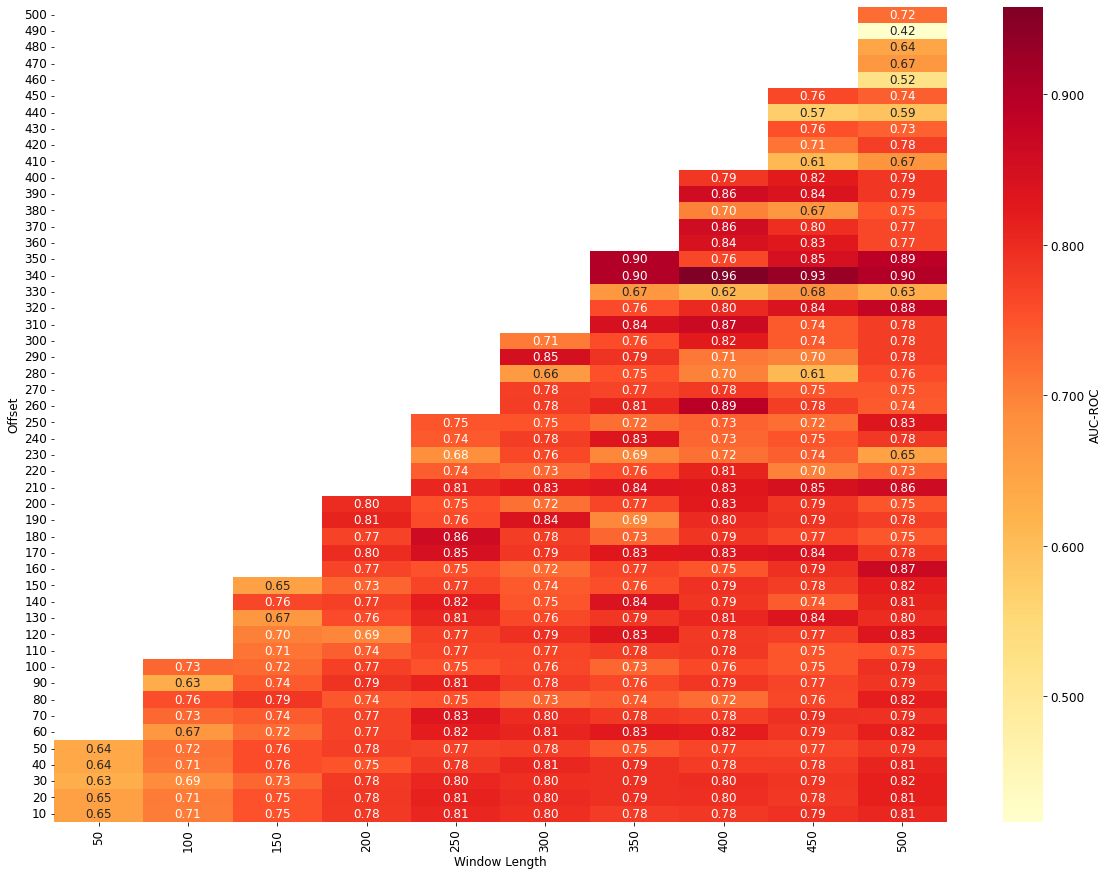

In [19]:
fig, ax = plt.subplots(figsize=(20, 15))

g = sns.heatmap(df_rocauc, annot=True, cbar=True, cbar_kws={"label": "AUC-ROC", "location":"right", "pad":0.05, "format":"%.3f"}, 
        annot_kws={"size": 12}, fmt=".2f", ax=ax, cmap="YlOrRd")

ax.set_ylabel("Offset", fontsize=12)
ax.set_xlabel("Window Length", fontsize=12)

# colobar
cax = g.figure.axes[-1]
cax.yaxis.label.set_size(12)
cax.tick_params(labelsize=12)

# x-axis
g.set_xticklabels(g.get_xticklabels(), rotation=90, fontsize=12)

# y-axis
if g.get_yticklabels():
        g.set_yticklabels(g.get_yticklabels(), fontsize=12)